In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

C:\Users\Lales\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lales\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Lales\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

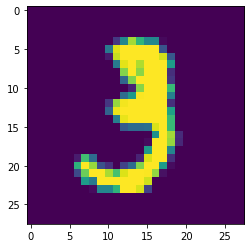

In [3]:
single_image = x_train[10]
plt.imshow(single_image)

In [7]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)

In [45]:
def model_creating():
    model = tf.keras.models.Sequential()
    model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.7))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [46]:
model=model_creating()
model.summary()
early_stop = EarlyStopping(monitor='val_loss',patience=2)
model.fit(x_train,y_cat_train,epochs=50,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                1290      
Total params: 1,182,154
Trainable params: 1,182,154
Non-trainable params: 0
___________________________________________

In [ ]:
#model.save_weights('MODELS/mnist/digit')
#model.save('MODELS/mnist/digit.h5')
#tfjs.converters.save_keras_model(model,"MODELS/fashion/models")

In [49]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,acc,val_loss,val_acc
0,1.657926,0.504083,0.197141,0.9491
1,0.526637,0.825300,0.106375,0.9704
2,0.323136,0.900350,0.087573,0.9764
3,0.257035,0.923617,0.087987,0.9735
4,0.230171,0.932017,0.081609,0.9781


<AxesSubplot:>

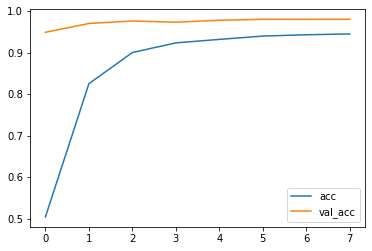

In [50]:
losses[['acc','val_acc']].plot()

<AxesSubplot:>

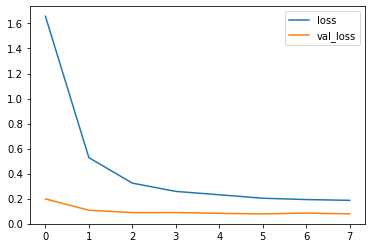

In [51]:
losses[['loss','val_loss']].plot()

In [52]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'acc']
[0.07747142851778371, 0.9806]


In [55]:
predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<AxesSubplot:>

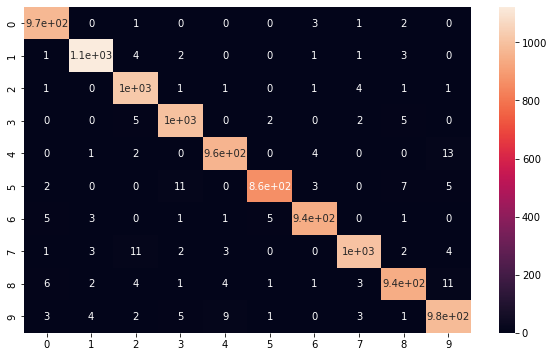

In [56]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

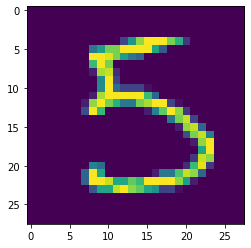

In [62]:
plt.imshow(x_test[15].reshape(28,28))

In [63]:
model.predict_classes(x_test[15].reshape(1,28,28,1))

array([5], dtype=int64)